Potertì Daniele & Sanvito Alessio

# Import the dataset

In [ ]:
import sys, os, re, json  # standard libraries for OS and regex processing and JSON handling
import nltk  # library for natural language processing tasks
import numpy as np  # numerical computing library
import pandas as pd  # library for working with tabular data
import matplotlib.pyplot as plt  # library for creating plots
import seaborn as sns  # library for making plots more attractive
from collections import defaultdict, Counter  # useful data structures for counting and dictionaries
from typing import List, Tuple, Dict  # library for type hints
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from tqdm import tqdm
from sklearn.metrics import (rand_score, adjusted_mutual_info_score,
                             homogeneity_score, completeness_score,
                             v_measure_score, fowlkes_mallows_score)
from sklearn.cluster import OPTICS
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/ProgettiDataScience-SAD/2ANNO1SEMESTRE/TEXT MINING AND SEARCH/Poterti Sanvito/Progetto TextMining/BalancedData_Tokenized_StopWord_Stemmed_normalized_longreviews.csv"
df1 = pd.read_csv(path)

Balanced dataset

In [ ]:
from sklearn.utils import resample


def downsample(df):
  df_majority = df[df.voted_up==0]
  df_minority = df[df.voted_up==1]


  # Downsample the majority class
  df_majority_downsampled = resample(df_majority, 
                                 replace=False,     # sample without replacement
                                 n_samples=df_minority.shape[0],    # to match minority class
                                 random_state=123) # reproducible results

  # Combine minority class with downsampled majority class
  df_downsampled = pd.concat([df_minority, df_majority_downsampled])

  return df_downsampled

In [ ]:
df2 = downsample(df1)

In [ ]:
class_counts = df2['voted_up'].value_counts()

In [ ]:
class_counts

True     459863
False    459863
Name: voted_up, dtype: int64

# Sample

In [ ]:
df = df2.sample(20000, random_state = 44)

In [ ]:
class_counts = df['voted_up'].value_counts()

In [ ]:
class_counts

False    10055
True      9945
Name: voted_up, dtype: int64

# TF-IDF

min_df is the minimum number of documents (or proportion of documents) in which a word must appear to be included in the vocabulary. For example, if min_df is set to 2, then a word that appears in only one document will be ignored. This can be useful to eliminate rare words that might not be meaningful.

max_df is the maximum number of documents (or proportion of documents) in which a word can appear to be included in the vocabulary. For example, if max_df is set to 0.8, then a word that appears in more than 80% of the documents will be ignored. This can be useful to eliminate common words that might not be informative.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=4, use_idf=True, ngram_range = (1,3), max_features = 1000) # Most 30000 frequent grams across the text, ngram_range = (1,3) uses unigram, bigrams and trigrams
tv_matrix = tv.fit(df['reviewclean'])
final_tv = tv_matrix.transform(df['reviewclean'])
# tv_matrix = tv_matrix.toarray()

vocab = tv.vocabulary_

In [ ]:
print(vocab)

{'definit': 215, 'deep': 212, 'extrem': 296, 'focu': 327, 'less': 490, 'similar': 781, 'fire': 321, 'final': 318, 'fantasi': 307, 'tactic': 865, 'everyon': 279, 'person': 626, 'goe': 369, 'due': 243, 'eat': 251, 'human': 421, 'finish': 320, 'grow': 379, 'trash': 912, 'black': 87, 'op': 597, 'ad': 10, 'expens': 291, 'drop': 242, 'rather': 694, 'multiplay': 563, 'simpli': 783, 'match': 523, 'lag': 476, 'happen': 391, 'campaign': 112, 'overal': 608, 'mess': 536, 'zombi': 998, 'aw': 64, 'piec': 629, 'cod': 144, 'deliv': 216, 'promis': 666, 'commun': 153, 'term': 878, 'obviou': 584, 'notic': 579, 'npc': 581, 'whole': 971, 'except': 285, 'load': 501, 'save': 747, 'found': 337, 'meet': 530, 'unfortun': 927, 'previou': 659, 'lose': 509, 'hundr': 423, 'frustrat': 348, 'ruin': 738, 'shame': 771, 'saw': 748, 'liter': 499, 'copi': 175, 'pirat': 630, 'version': 948, 'onto': 596, 'told': 898, 'five': 323, 'pure': 674, 'cri': 190, 'begin': 78, 'certain': 122, 'fill': 317, 'believ': 80, 'special': 819

# Bag Of Words

In [ ]:
vectoriz = CountVectorizer(ngram_range=(1,3), max_features = 1000)
bow = vectoriz.fit_transform(df['reviewclean'])

# SVD Dimensionality Reduction



1.   Creating a list of tuples containing the inverse document frequency (idf) scores and corresponding feature names for a term-document matrix (tv_matrix).
2. Sorting this list by idf score.
3. Selecting the top 1000 features (top_1000_feat) based on idf score.
4. Initializing an empty co-occurrence matrix (ooccurrenceMatrix) of size 1000x1000.
5. Setting the context window size for calculating co-occurrences to 4.
6. Iterating through each review in a DataFrame (df) and each sentence within each review, and calculating the co-occurrence matrix for each review.
7. Initializing a list (n_comp) containing different values for the number of components to use in a truncated singular value decomposition (TruncatedSVD).
8. Iterating through the values in n_comp, fitting a TruncatedSVD model to the co-occurrence matrix with each value, and appending the explained variance ratio to a list (explained).
9. Plotting the number of components against the explained variance ratio.

Overall, this code calculates the co-occurrence matrix for a set of reviews and using TruncatedSVD to reduce the dimensions of the matrix. The explained variance ratio is plotted as a function of the number of components to help determine the appropriate number of dimensions to retain.

Define the optimal number of components

In [ ]:
idf_score = tv_matrix.idf_
feature_name = tv_matrix.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Choose the top features referring to the top idf-score

In [ ]:
idfscore_feat =zip(idf_score,feature_name) 
idfscore_feat_sorted =sorted(idfscore_feat)# sorting the idfscore

top_1000_feat = idfscore_feat_sorted

In [ ]:
top_1000_feat_names = [] # list of top 1000 features
# obtaining the top 1000 feature names
for i in range(len(top_1000_feat)):
    top_1000_feat_names.append(top_1000_feat[i][1])

Calculating the co-occurrence matrix (dimension is number of top feature chosen both for rows and columns)

In [ ]:
cooccurrenceMatrix = np.zeros((1000,1000)) # co-occurance matrix
context_window = 4 # context window for co-occurance matrix

#Calulating the co - occurance matrix for each review.
for sent in tqdm(df['reviewclean']): # obtaining each sentence of review
    words_sent = sent.split() # obtaining each word of sentence
    for index,word in enumerate(words_sent): # obtaining the index of each word from sentence
        if word in top_1000_feat_names: # checking if the word is in Top 1000
            for j in range(max(index - context_window,0),min(index + context_window , len(words_sent) -1) + 1):
                if words_sent[j] in top_1000_feat_names:
                    if words_sent[j] != word:
                        cooccurrenceMatrix[top_1000_feat_names.index(words_sent[j]), top_1000_feat_names.index(word)] += 1    
                    else:
                        pass
                else:
                    pass
        else:
            pass

100%|██████████| 20000/20000 [01:21<00:00, 245.40it/s]


Finding optimal value for number of components (n) to be retained.
Performed SVD with different values and chosen the one that obtains the variance of ~ 97% 

In [ ]:
n_comp = [4,10,15,20,50,100,150,200,300,350,400,500
          #,700,800,900,1000,1500
          ] # list containing different values of components
explained = [] # explained variance ratio for each component of Truncated SVD
for x in n_comp:
    svd_tr = TruncatedSVD(n_components=x)
    svd_tr.fit(cooccurrenceMatrix)
    explained.append(svd_tr.explained_variance_ratio_.sum())
    print("Number of components = %r and explained variance = %r"%(x,svd_tr.explained_variance_ratio_.sum()))

plt.plot(n_comp, explained)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()

Number of components = 4 and explained variance = 0.3507544149187322
Number of components = 10 and explained variance = 0.48772056085836457
Number of components = 15 and explained variance = 0.5492331943853359
Number of components = 20 and explained variance = 0.5963335162061876
Number of components = 50 and explained variance = 0.7233975643122426
Number of components = 100 and explained variance = 0.8147788046260127
Number of components = 150 and explained variance = 0.8687795361921075
Number of components = 200 and explained variance = 0.9042525192301853
Number of components = 300 and explained variance = 0.9474071724002526
Number of components = 350 and explained variance = 0.9612252241513557
Number of components = 400 and explained variance = 0.9715974097787993
Number of components = 500 and explained variance = 0.9855040789147548


Use n_components in the SVD

In [ ]:
def svd(data, n_comp):
  svd = TruncatedSVD(n_components = n_comp)
  temp = svd.fit_transform(data)
  print('Explained variance ratio: ', sum(svd.explained_variance_ratio_))
  return temp

In [ ]:
svd_tfidf = svd(final_tv, n_comp = 400)

Explained variance ratio:  0.6139457261791574


In [ ]:
svd_bow = svd(bow, n_comp = 400)

Explained variance ratio:  0.9789503414025237


# t-SNE for dimensionality reduction (NOT USED)

In [ ]:
# t_sne = TSNE(n_components=2, init='random', learning_rate='auto')
# tsne_tfidf = t_sne.fit_transform(final_tv)
# scatter_x = tsne_tfidf[:, 0]
# scatter_y = tsne_tfidf[:, 1]

# Clustering

In [2]:
# visualize the distribution of the reviews with voted_up true and false
sns.scatterplot(x = svd_tfidf[:, 0], y=svd_tfidf[:, 1], hue=df.voted_up, s=150)

## Optimal number of clusters (calculated with k-means and three different metrics)

In [ ]:
kelbow_visualizer(KMeans(random_state=42, verbose=1),
                  svd_tfidf, 
                  k=(2,11),
                  metric='silhouette')

Initialization complete
Iteration 0, inertia 18274.594642238855
Iteration 1, inertia 11989.930995145074
Iteration 2, inertia 11987.647249371721
Iteration 3, inertia 11987.206681737847
Iteration 4, inertia 11987.11779814073
Iteration 5, inertia 11987.069982417986
Iteration 6, inertia 11986.914423205715
Iteration 7, inertia 11986.058414624971
Iteration 8, inertia 11981.947195155984
Iteration 9, inertia 11976.55279706376
Iteration 10, inertia 11974.852312449164
Iteration 11, inertia 11973.841575600854
Iteration 12, inertia 11972.321429503814
Iteration 13, inertia 11971.13213421415
Iteration 14, inertia 11970.779677607528
Iteration 15, inertia 11970.359394260444
Iteration 16, inertia 11969.923471865583
Iteration 17, inertia 11969.699643950897
Iteration 18, inertia 11969.583929712784
Iteration 19, inertia 11969.517625882718
Iteration 20, inertia 11969.465240866017
Iteration 21, inertia 11969.320594886645
Iteration 22, inertia 11969.132210153446
Iteration 23, inertia 11968.7748438352
Iterati

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d075e7f10>,
                 estimator=KMeans(n_clusters=10, random_state=42, verbose=1),
                 k=(2, 11), metric='silhouette')

In [ ]:
kelbow_visualizer(KMeans(random_state=42, verbose=1),
                  svd_tfidf, 
                  k=(2,11),
                  metric='distortion')

Initialization complete
Iteration 0, inertia 18274.594642238855
Iteration 1, inertia 11989.930995145074
Iteration 2, inertia 11987.647249371721
Iteration 3, inertia 11987.206681737847
Iteration 4, inertia 11987.11779814073
Iteration 5, inertia 11987.069982417986
Iteration 6, inertia 11986.914423205715
Iteration 7, inertia 11986.058414624971
Iteration 8, inertia 11981.947195155984
Iteration 9, inertia 11976.55279706376
Iteration 10, inertia 11974.852312449164
Iteration 11, inertia 11973.841575600854
Iteration 12, inertia 11972.321429503814
Iteration 13, inertia 11971.13213421415
Iteration 14, inertia 11970.779677607528
Iteration 15, inertia 11970.359394260444
Iteration 16, inertia 11969.923471865583
Iteration 17, inertia 11969.699643950897
Iteration 18, inertia 11969.583929712784
Iteration 19, inertia 11969.517625882718
Iteration 20, inertia 11969.465240866017
Iteration 21, inertia 11969.320594886645
Iteration 22, inertia 11969.132210153446
Iteration 23, inertia 11968.7748438352
Iterati

/usr/local/lib/python3.8/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.8/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d05d15850>,
                 estimator=KMeans(n_clusters=10, random_state=42, verbose=1),
                 k=(2, 11))

In [ ]:
kelbow_visualizer(KMeans(random_state=42, verbose=1),
                  svd_tfidf, 
                  k=(2,11),
                  metric='calinski_harabasz')

Initialization complete
Iteration 0, inertia 18274.594642238855
Iteration 1, inertia 11989.930995145074
Iteration 2, inertia 11987.647249371721
Iteration 3, inertia 11987.206681737847
Iteration 4, inertia 11987.11779814073
Iteration 5, inertia 11987.069982417986
Iteration 6, inertia 11986.914423205715
Iteration 7, inertia 11986.058414624971
Iteration 8, inertia 11981.947195155984
Iteration 9, inertia 11976.55279706376
Iteration 10, inertia 11974.852312449164
Iteration 11, inertia 11973.841575600854
Iteration 12, inertia 11972.321429503814
Iteration 13, inertia 11971.13213421415
Iteration 14, inertia 11970.779677607528
Iteration 15, inertia 11970.359394260444
Iteration 16, inertia 11969.923471865583
Iteration 17, inertia 11969.699643950897
Iteration 18, inertia 11969.583929712784
Iteration 19, inertia 11969.517625882718
Iteration 20, inertia 11969.465240866017
Iteration 21, inertia 11969.320594886645
Iteration 22, inertia 11969.132210153446
Iteration 23, inertia 11968.7748438352
Iterati

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d04ca6e20>,
                 estimator=KMeans(n_clusters=10, random_state=42, verbose=1),
                 k=(2, 11), metric='calinski_harabasz')

## Kmeans

### KMeans clustering

In [ ]:
kmeans = KMeans(n_clusters = 2, random_state=42)
pred_labels = kmeans.fit_predict(svd_tfidf)

clusters = kmeans.labels_

In [ ]:
# assign the cluster labels to the original dataset
df['cluster'] = pred_labels

# create a contingency table
cluster_counts = df.groupby(['cluster', 'voted_up']).size().reset_index(name='counts')
print(cluster_counts)

   cluster  voted_up  counts
0        0     False    7332
1        0      True    5211
2        1     False    2723
3        1      True    4734


#### Evaluation of the clustering

In [ ]:
def score_clustering(true_labels, predicted_labels):
  d = {
      "Rand index": rand_score(true_labels, predicted_labels),
      "Adjusted Mutual Info": adjusted_mutual_info_score(true_labels, predicted_labels),
      "Homogeneity": homogeneity_score(true_labels, predicted_labels),
      "Completeness": completeness_score(true_labels, predicted_labels),
      "V measure": v_measure_score(true_labels, predicted_labels),
      "Fowlkes Mallows": fowlkes_mallows_score(true_labels, predicted_labels)
  }
  for k, v in d.items():
    print(f"{k:21s}: {v}")

In [ ]:
score_clustering(df.voted_up, pred_labels)

Rand index           : 0.5213178458922946
Adjusted Mutual Info : 0.033537300793458825
Homogeneity          : 0.03278162229110691
Completeness         : 0.03440353998606366
V measure            : 0.03357300377269041
Fowlkes Mallows      : 0.5365589969852546


In [ ]:
# Evaluate the model's performance
score = silhouette_score(svd_tfidf, kmeans.labels_)
print(f"The model's performance is {score:.3f}")

The model's performance is 0.004


In [ ]:
# Evaluate the model's performance
score = calinski_harabasz_score(svd_tfidf, kmeans.labels_)
print(f"The model's performance is {score:.3f}")

The model's performance is 114.981


In [ ]:
# Evaluate the model's performance
score = davies_bouldin_score(svd_tfidf, kmeans.labels_)
print(f"The model's performance is {score:.3f}")

The model's performance is 12.643


#### Visualization of the results

##### WordCloud

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


For cluster 0 , the word cloud is as shown below


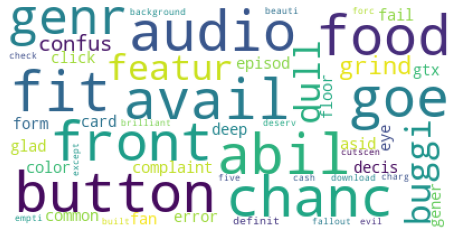

For cluster 1 , the word cloud is as shown below


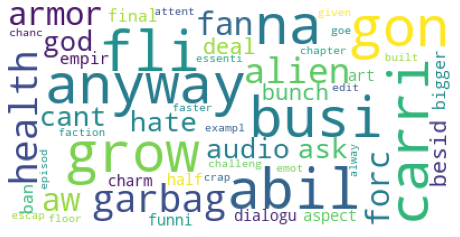

In [ ]:
# THIS IS A GENERAL WORDCLOUD
#General WordCloud (passed the svd_tfidf vector, not the result of the clustering)


n_clusters = 2

# define the number of top words to include in the word cloud
n = 50

# extract the top words for each cluster
top_words = []
for i in range(n_clusters):
    top_words.append([tv.get_feature_names()[index] for index in svd_tfidf[i].argsort()[-n:][::-1]])

# create a list of strings, where each string represents the top words for a cluster
text = [' '.join(words) for words in top_words]

# create the word clouds
for i in range(n_clusters):
    wordcloud = WordCloud(max_font_size=50, max_words=500, background_color="white").generate(text[i])

    print("For cluster", i,", the word cloud is as shown below")
    #print('-'*117)
    # display the word cloud
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


Cluster 0
suck,real,unless,alway,happen,patch,anyon,alreadi,ban,stuff,terribl,purchas,yet,surviv,finish,lag,gun,abl,stop,pleas,comput,singl,mayb,screen,car,life,save,pay,guy,awesom,hacker,sure,free,team,zombi,wont,load,minut,content,old,support,access,version,cant,wast,commun,refund,onlin,multiplay,fp



Cluster 1
learn,act,attack,mean,kind,done,finish,main,skill,difficult,replay,space,uniqu,origin,lack,might,gener,visual,may,quest,definit,expect,dark,voic,move,person,sound,choic,battl,seri,simpl,youll,item,fan,art,overal,difficulti,rpg,beauti,ship,style,boss,design,short,explor,mission,easi,music,challeng,puzzl


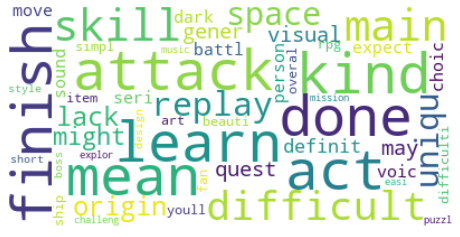

In [ ]:
# WORDCLOUD WITH MOST FREQUENT WORDS PER CLUSTER
# for every cluster there is a wordcloud with the most frequent words


def get_top_keywords_wordcloud(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(final_tv.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = tv.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        top_keywords = [terms[t] for t in np.argsort(r)[-n_terms:]]
        print(','.join(top_keywords)) # for each row of the dataframe, find the n terms that have the highest tf idf score
        wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(top_keywords))
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()


get_top_keywords_wordcloud(50)

For cluster 0 , the word cloud is as shown below


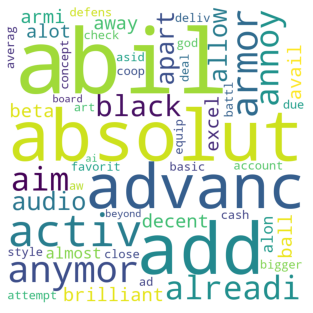

For cluster 1 , the word cloud is as shown below


In [ ]:
# ANOTHER METHOD TO CREATE WORDCLOUD WITH MOST FREQUENT WORDS PER CLUSTER (NOT CONSIDERED)

labels_tf = kmeans.labels_
cluster_center_tf=kmeans.cluster_centers_
terms1 = tv.get_feature_names()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
n=50
for i in range(2):
  top_words = [terms1[ind] for ind in order_centroids[i, :n]]
  # put together words in a text
  cluster_text = " ".join(top_words)
  # wordcloud
  wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(cluster_text)
  # Visualize wordcloud
  print("For cluster", i,", the word cloud is as shown below")
    #print('-'*117)
    # display the word cloud
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

##### Scatterplot

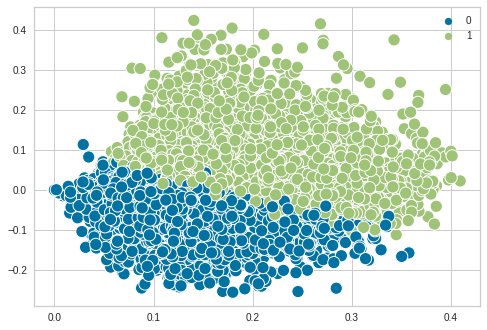

In [ ]:
sns.scatterplot(x = svd_tfidf[:, 0], y=svd_tfidf[:, 1], hue=clusters, s=150)

##### Top terms per cluster

In [ ]:
labels_tf = kmeans.labels_
cluster_center_tf=kmeans.cluster_centers_

In [ ]:
# to understand what kind of words generated as columns by BOW
terms1 = tv.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
for i in range(2):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :20]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: abil
 absolut
 add
 advanc
 activ
 anymor
 armor
 alreadi
 annoy
 aim
 black
 audio
 apart
 allow
 brilliant
 decent
 armi
 avail
 beta
 away
Cluster 1: abil
 abl
 act
 account
 action
 ago
 age
 access
 achiev
 across
 becom
 appar
 air
 along
 amount
 atmospher
 attack
 adventur
 approach
 becam


##### Other visualization (with PCA)

In [ ]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(final_tv.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

Visualize cluster

In [ ]:
# assign clusters and pca vectors to our dataframe 
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1

In [ ]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(final_tv.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = tv.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
support,access,version,cant,wast,commun,refund,onlin,multiplay,fp

Cluster 1
style,boss,design,short,explor,mission,easi,music,challeng,puzzl


In [ ]:
# map clusters to appropriate labels 
cluster_map = {0: "negative", 1: "positive"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

In [ ]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

## Hierarchical

#### Euclidean affinity, single linkage

In [ ]:
clustering_algorithm_EASL = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')
pred_labels_agg_EASL = clustering_algorithm_EASL.fit_predict(svd_tfidf)

cluster_EASL = clustering_algorithm_EASL.labels_

In [ ]:
# assign the cluster labels to the original dataset
df['cluster_EASL'] = pred_labels_agg_EASL

# create a contingency table
cluster_counts_EASL = df.groupby(['cluster_EASL', 'voted_up']).size().reset_index(name='counts')
print(cluster_counts_EASL)

   cluster_EASL  voted_up  counts
0             0     False   10054
1             0      True    9945
2             1     False       1


In [ ]:
score_clustering(df.voted_up, pred_labels_agg_EASL)

Rand index           : 0.49998957947897393
Adjusted Mutual Info : -7.886413258215647e-07
Homogeneity          : 4.9607212119951074e-05
Completeness         : 0.06307051313131588
V measure            : 9.91364498798748e-05
Fowlkes Mallows      : 0.707064055437394


In [ ]:
# Evaluate the model's performance
score = silhouette_score(svd_tfidf, cluster_EASL)
print(f"The model's performance is {score:.3f}")

The model's performance is 0.104


In [ ]:
# Evaluate the model's performance
score = calinski_harabasz_score(svd_tfidf, cluster_EASL)
print(f"The model's performance is {score:.3f}")

The model's performance is 1.481


In [ ]:
# Evaluate the model's performance
score = davies_bouldin_score(svd_tfidf, cluster_EASL)
print(f"The model's performance is {score:.3f}")

The model's performance is 0.816


##### Visualization

###### WordCloud


Cluster 0
last,seri,may,lack,definit,abl,move,explor,probabl,almost,done,refund,open,life,support,wont,cant,might,youll,design,wast,mayb,real,save,mean,alway,short,onlin,music,commun,access,overal,origin,person,fan,yet,awesom,minut,sure,expect,version,mission,finish,challeng,easi,content,old,multiplay,puzzl,fp


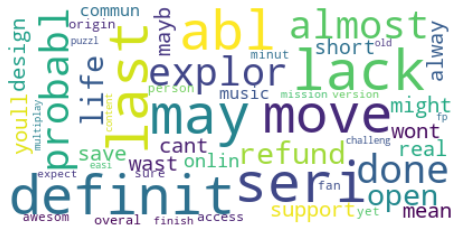


Cluster 1
gather,gave,gb,gear,gener,genr,giant,girl,given,glad,glitch,goal,garbag,franchis,zone,frame,fine,fit,five,flaw,fli,floor,final,focu,focus,fill,fire,follow,file,forc,forev,forget,form,forum,forward,found,four,fp,food,finish,help,instead,next,stuff,team,surviv,pleas,other,potenti,zombi


In [ ]:
def get_top_keywords_wordcloud(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(final_tv.todense()).groupby(cluster_EASL).mean() # groups the TF-IDF vector by cluster
    terms = tv.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        top_keywords = [terms[t] for t in np.argsort(r)[-n_terms:]]
        print(','.join(top_keywords)) # for each row of the dataframe, find the n terms that have the highest tf idf score
        wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(top_keywords))
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()


get_top_keywords_wordcloud(50)

###### Scatterplot

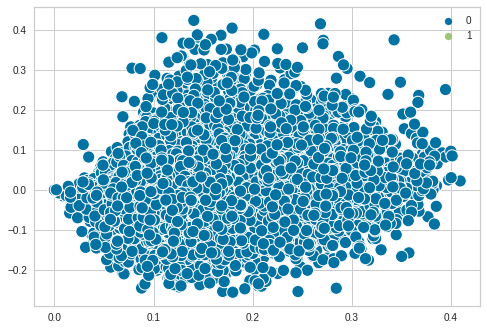

In [ ]:
sns.scatterplot(x = svd_tfidf[:, 0], y=svd_tfidf[:, 1], hue=cluster_EASL, s=150)

###### Other visualization (with PCA)

In [ ]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(final_tv.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

Visualize cluster

In [ ]:
# assign clusters and pca vectors to our dataframe 
df['cluster'] = cluster_EASL
df['x0'] = x0
df['x1'] = x1

In [ ]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(final_tv.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = tv.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
support,access,version,cant,wast,commun,refund,onlin,multiplay,fp

Cluster 1
style,boss,design,short,explor,mission,easi,music,challeng,puzzl


In [ ]:
# map clusters to appropriate labels 
cluster_map = {0: "negative", 1: "positive"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

In [ ]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + Hierarchical cluster_EASL", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

#### Euclidean affinity, complete linkage

In [ ]:
clustering_algorithm_EACL = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'complete')
pred_labels_agg_EACL = clustering_algorithm_EACL.fit_predict(svd_tfidf)

cluster_EACL = clustering_algorithm_EACL.labels_

In [ ]:
# assign the cluster labels to the original dataset
df['cluster_EACL'] = pred_labels_agg_EACL

# create a contingency table
cluster_counts_EACL = df.groupby(['cluster_EACL', 'voted_up']).size().reset_index(name='counts')
print(cluster_counts_EACL)

   cluster_EACL  voted_up  counts
0             0     False   10036
1             0      True    9905
2             1     False      19
3             1      True      40


In [ ]:
score_clustering(df.voted_up, pred_labels_agg_EACL)

Rand index           : 0.5000038801940097
Adjusted Mutual Info : 0.0004828778599522623
Homogeneity          : 0.00028481507516471197
Completeness         : 0.009805907208387407
V measure            : 0.0005535520887672094
Fowlkes Mallows      : 0.7050265084512186


In [ ]:
# Evaluate the model's performance
score = silhouette_score(svd_tfidf, cluster_EACL)
print(f"The model's performance is {score:.3f}")

The model's performance is 0.107


In [ ]:
# Evaluate the model's performance
score = calinski_harabasz_score(svd_tfidf, cluster_EACL)
print(f"The model's performance is {score:.3f}")

The model's performance is 68.374


In [ ]:
# Evaluate the model's performance
score = davies_bouldin_score(svd_tfidf, cluster_EACL)
print(f"The model's performance is {score:.3f}")

The model's performance is 1.408


##### Visualization

###### WordCloud


Cluster 0
last,seri,may,lack,definit,abl,move,explor,probabl,almost,done,refund,open,life,support,wont,cant,might,design,youll,wast,mayb,save,real,mean,onlin,alway,short,music,commun,access,overal,person,origin,fan,yet,awesom,minut,sure,expect,version,mission,finish,challeng,easi,content,old,multiplay,puzzl,fp


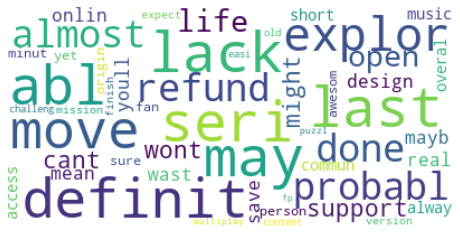


Cluster 1
ubisoft,rip,mess,fantasi,beta,magic,etc,soundtrack,fill,farm,save,size,tree,normal,war,version,internet,indi,sim,kind,ban,total,minecraft,final,ball,coop,rank,ton,joke,casual,readi,click,ok,stage,ai,plu,gta,onlin,recomend,super,hacker,surviv,lol,simpl,rpg,arma,con,na,multiplay,de


In [ ]:
def get_top_keywords_wordcloud(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(final_tv.todense()).groupby(cluster_EACL).mean() # groups the TF-IDF vector by cluster
    terms = tv.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        top_keywords = [terms[t] for t in np.argsort(r)[-n_terms:]]
        print(','.join(top_keywords)) # for each row of the dataframe, find the n terms that have the highest tf idf score
        wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(top_keywords))
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()


get_top_keywords_wordcloud(50)

###### Scatterplot

In [ ]:
sns.scatterplot(x = svd_tfidf[:, 0], y=svd_tfidf[:, 1], hue=cluster_EACL, s=150)

###### Other visualization (with PCA)

In [ ]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(final_tv.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

Visualize cluster

In [ ]:
# assign clusters and pca vectors to our dataframe 
df['cluster'] = cluster_EACL
df['x0'] = x0
df['x1'] = x1

In [ ]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(final_tv.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = tv.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
support,access,version,cant,wast,commun,refund,onlin,multiplay,fp

Cluster 1
style,boss,design,short,explor,mission,easi,music,challeng,puzzl


In [ ]:
# map clusters to appropriate labels 
cluster_map = {0: "negative", 1: "positive"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

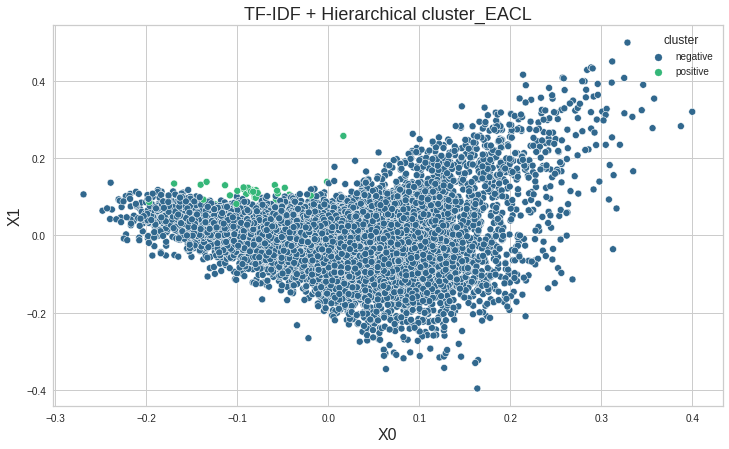

In [ ]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + Hierarchical cluster_EACL", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

#### Euclidean affinity, ward linkage

In [ ]:
clustering_algorithm_EAWL = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')
pred_labels_agg_EAWL = clustering_algorithm_EAWL.fit_predict(svd_tfidf)

cluster_EAWL = clustering_algorithm_EAWL.labels_

In [ ]:
# assign the cluster labels to the original dataset
df['cluster_EAWL'] = pred_labels_agg_EAWL

# create a contingency table
cluster_counts_EAWL = df.groupby(['cluster_EAWL', 'voted_up']).size().reset_index(name='counts')
print(cluster_counts_EAWL)

   cluster_EAWL  voted_up  counts
0             0     False   10001
1             0      True    9839
2             1     False      54
3             1      True     106


In [ ]:
score_clustering(df.voted_up, pred_labels_agg_EAWL)

Rand index           : 0.5000322466123306
Adjusted Mutual Info : 0.0011441142354577253
Homogeneity          : 0.0006466529592096146
Completeness         : 0.009619517834688679
V measure            : 0.0012118422338479409
Fowlkes Mallows      : 0.7014953270898591


In [ ]:
# Evaluate the model's performance
score = silhouette_score(svd_tfidf, cluster_EAWL)
print(f"The model's performance is {score:.3f}")

The model's performance is 0.025


In [ ]:
# Evaluate the model's performance
score = calinski_harabasz_score(svd_tfidf, cluster_EAWL)
print(f"The model's performance is {score:.3f}")

The model's performance is 73.895


In [ ]:
# Evaluate the model's performance
score = davies_bouldin_score(svd_tfidf, cluster_EAWL)
print(f"The model's performance is {score:.3f}")

The model's performance is 2.611


##### Visualization

###### WordCloud


Cluster 0
last,stuff,may,lack,definit,explor,move,abl,probabl,almost,done,refund,open,life,support,design,wont,might,youll,cant,wast,mayb,save,real,mean,alway,short,onlin,music,overal,person,commun,access,fan,origin,yet,challeng,awesom,sure,expect,minut,version,finish,mission,easi,content,old,multiplay,puzzl,fp


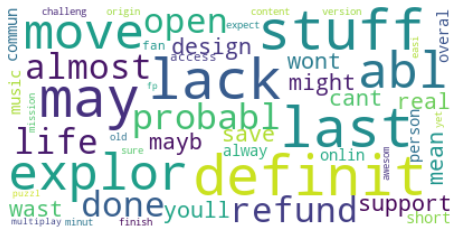


Cluster 1
entir,previou,platform,art,difficult,light,top,lose,overal,death,mention,frustrat,beauti,probabl,content,ii,certain,punish,chanc,second,version,often,learn,worst,port,explor,ps,uniqu,person,although,style,extrem,dead,item,difficulti,becom,reward,atmospher,attack,lore,area,design,fan,pvp,seri,challeng,boss,dark soul,dark,soul


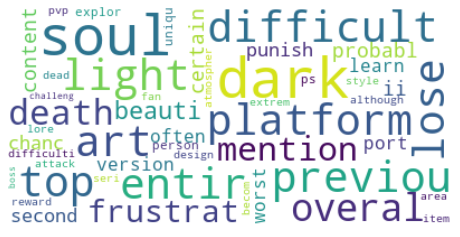

In [ ]:
def get_top_keywords_wordcloud(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(final_tv.todense()).groupby(cluster_EAWL).mean() # groups the TF-IDF vector by cluster
    terms = tv.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        top_keywords = [terms[t] for t in np.argsort(r)[-n_terms:]]
        print(','.join(top_keywords)) # for each row of the dataframe, find the n terms that have the highest tf idf score
        wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(top_keywords))
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()


get_top_keywords_wordcloud(50)

###### Scatterplot

In [ ]:
sns.scatterplot(x = svd_tfidf[:, 0], y=svd_tfidf[:, 1], hue=cluster_EAWL, s=150)

###### Other visualization (with PCA)

In [ ]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(final_tv.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

Visualize cluster

In [ ]:
# assign clusters and pca vectors to our dataframe 
df['cluster'] = cluster_EAWL
df['x0'] = x0
df['x1'] = x1

In [ ]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(final_tv.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = tv.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
support,access,version,cant,wast,commun,refund,onlin,multiplay,fp

Cluster 1
style,boss,design,short,explor,mission,easi,music,challeng,puzzl


In [ ]:
# map clusters to appropriate labels 
cluster_map = {0: "negative", 1: "positive"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

In [ ]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + Hierarchical cluster_EAWL", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

#### Manhattan affinity, single linkage

In [ ]:
clustering_algorithm_MASL = AgglomerativeClustering(n_clusters=2, affinity = 'manhattan', linkage = 'single')
pred_labels_agg_MASL = clustering_algorithm_MASL.fit_predict(svd_tfidf)

cluster_MASL = clustering_algorithm_MASL.labels_

In [ ]:
# assign the cluster labels to the original dataset
df['cluster_MASL'] = pred_labels_agg_MASL

# create a contingency table
cluster_counts_MASL = df.groupby(['cluster_MASL', 'voted_up']).size().reset_index(name='counts')
print(cluster_counts_MASL)

   cluster_MASL  voted_up  counts
0             0     False   10055
1             0      True    9944
2             1      True       1


In [ ]:
score_clustering(df.voted_up, pred_labels_agg_MASL)

Rand index           : 0.4999906795339767
Adjusted Mutual Info : 7.973643648737832e-07
Homogeneity          : 5.040075938722612e-05
Completeness         : 0.06407942758552812
V measure            : 0.00010072229708893184
Fowlkes Mallows      : 0.7070648333403241


In [ ]:
# Evaluate the model's performance
score = silhouette_score(svd_tfidf, cluster_MASL)
print(f"The model's performance is {score:.3f}")

The model's performance is 0.107


In [ ]:
# Evaluate the model's performance
score = calinski_harabasz_score(svd_tfidf, cluster_MASL)
print(f"The model's performance is {score:.3f}")

The model's performance is 1.497


In [ ]:
# Evaluate the model's performance
score = davies_bouldin_score(svd_tfidf, cluster_MASL)
print(f"The model's performance is {score:.3f}")

The model's performance is 0.812


##### Visualization

###### WordCloud

In [ ]:
def get_top_keywords_wordcloud(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(final_tv.todense()).groupby(cluster_MASL).mean() # groups the TF-IDF vector by cluster
    terms = tv.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        top_keywords = [terms[t] for t in np.argsort(r)[-n_terms:]]
        print(','.join(top_keywords)) # for each row of the dataframe, find the n terms that have the highest tf idf score
        wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(top_keywords))
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()


get_top_keywords_wordcloud(50)


Cluster 0
last,seri,may,lack,definit,abl,move,explor,probabl,almost,done,refund,open,life,support,wont,cant,might,youll,design,wast,mayb,real,save,mean,alway,short,onlin,music,commun,access,overal,origin,person,fan,yet,awesom,minut,sure,expect,version,mission,finish,challeng,easi,content,old,multiplay,puzzl,fp



Cluster 1
gb,gear,gener,genr,giant,girl,given,glad,glitch,goal,god,goe,gold,gon,felt,freez,frequent,franchis,file,fill,final,fine,finish,fire,fit,five,flaw,fli,free,focu,focus,floor,food,frame,fp,four,found,follow,forum,forward,forget,forev,forc,form,zone,done,especi,pick,awesom,month


###### Scatterplot

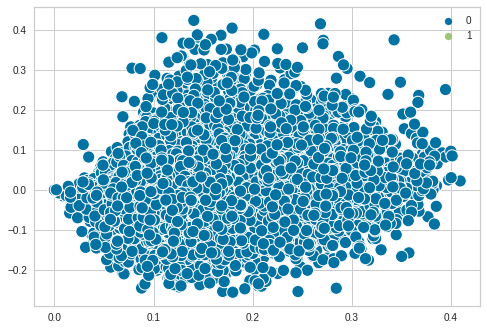

In [ ]:
sns.scatterplot(x = svd_tfidf[:, 0], y=svd_tfidf[:, 1], hue=cluster_MASL, s=150)

###### Other visualization (with PCA)

In [ ]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(final_tv.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

Visualize cluster

In [ ]:
# assign clusters and pca vectors to our dataframe 
df['cluster'] = cluster_MASL
df['x0'] = x0
df['x1'] = x1

In [ ]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(final_tv.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = tv.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
support,access,version,cant,wast,commun,refund,onlin,multiplay,fp

Cluster 1
style,boss,design,short,explor,mission,easi,music,challeng,puzzl


In [ ]:
# map clusters to appropriate labels 
cluster_map = {0: "negative", 1: "positive"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

In [ ]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + Hierarchical cluster_MASL", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

#### Manhattan affinity, complete linkage

In [ ]:
clustering_algorithm_MACL = AgglomerativeClustering(n_clusters=2, affinity = 'manhattan', linkage = 'complete')
pred_labels_agg_MACL = clustering_algorithm_MACL.fit_predict(svd_tfidf)

cluster_MACL = clustering_algorithm_MACL.labels_

In [ ]:
# assign the cluster labels to the original dataset
df['cluster_MACL'] = pred_labels_agg_MACL

# create a contingency table
cluster_counts_MACL = df.groupby(['cluster_MACL', 'voted_up']).size().reset_index(name='counts')
print(cluster_counts_MACL)

   cluster_MACL  voted_up  counts
0             0     False    5120
1             0      True    4928
2             1     False    4935
3             1      True    5017


In [ ]:
score_clustering(df.voted_up, pred_labels_agg_MACL)

Rand index           : 0.5000688484424222
Adjusted Mutual Info : 9.881513376229252e-05
Homogeneity          : 0.0001348826949917933
Completeness         : 0.00013488199346038755
V measure            : 0.00013488234422517827
Fowlkes Mallows      : 0.5000571716970795


In [ ]:
# Evaluate the model's performance
score = silhouette_score(svd_tfidf, cluster_MACL)
print(f"The model's performance is {score:.3f}")

The model's performance is 0.001


In [ ]:
# Evaluate the model's performance
score = calinski_harabasz_score(svd_tfidf, cluster_MACL)
print(f"The model's performance is {score:.3f}")

The model's performance is 14.937


In [ ]:
# Evaluate the model's performance
score = davies_bouldin_score(svd_tfidf, cluster_MACL)
print(f"The model's performance is {score:.3f}")

The model's performance is 36.346


##### Visualization

###### WordCloud


Cluster 0
design,thought,item,option,challeng,pleas,final,abl,move,may,help,last,definit,sure,overal,yet,cant,youll,expect,real,done,awesom,might,mean,open,person,short,mayb,learn,support,alway,fp,life,refund,wast,ship,load,save,wont,music,zombi,minut,onlin,content,easi,version,finish,old,multiplay,puzzl



Cluster 1
minut,singl,everyon,cant,youll,alway,place,mean,quest,id,probabl,sound,real,basic,short,total,almost,style,stuff,absolut,guy,big,puzzl,easi,free,battl,design,old,team,person,content,ai,overal,surviv,car,multiplay,seri,lack,awesom,yet,expect,sure,explor,fan,commun,challeng,origin,mission,access,fp


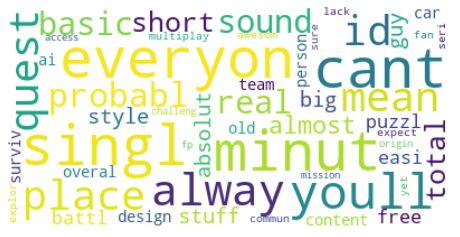

In [ ]:
def get_top_keywords_wordcloud(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(final_tv.todense()).groupby(cluster_MACL).mean() # groups the TF-IDF vector by cluster
    terms = tv.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        top_keywords = [terms[t] for t in np.argsort(r)[-n_terms:]]
        print(','.join(top_keywords)) # for each row of the dataframe, find the n terms that have the highest tf idf score
        wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(top_keywords))
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()


get_top_keywords_wordcloud(50)


Cluster 0
design,thought,item,option,challeng,pleas,final,abl,move,may,help,last,definit,sure,overal,yet,cant,youll,expect,real,done,awesom,might,mean,open,person,short,mayb,learn,support,alway,fp,life,refund,wast,ship,load,save,wont,music,zombi,minut,onlin,content,easi,version,finish,old,multiplay,puzzl


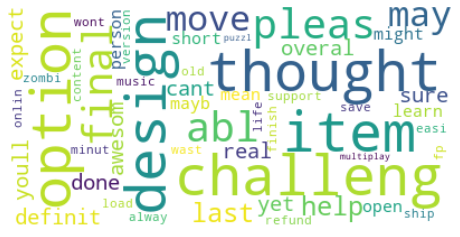


Cluster 1
minut,singl,everyon,cant,youll,alway,place,mean,quest,id,probabl,sound,real,basic,short,total,almost,style,stuff,absolut,guy,big,puzzl,easi,free,battl,design,old,team,person,content,ai,overal,surviv,car,multiplay,seri,lack,awesom,yet,expect,sure,explor,fan,commun,challeng,origin,mission,access,fp


In [ ]:
get_top_keywords_wordcloud(50)

###### Scatterplot

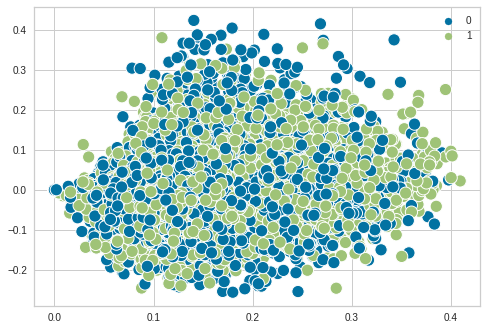

In [ ]:
sns.scatterplot(x = svd_tfidf[:, 0], y=svd_tfidf[:, 1], hue=cluster_MACL, s=150)

###### Other visualization (with PCA)

In [ ]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(final_tv.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

Visualize cluster

In [ ]:
# assign clusters and pca vectors to our dataframe 
df['cluster'] = cluster_MACL
df['x0'] = x0
df['x1'] = x1

In [ ]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(final_tv.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = tv.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
support,access,version,cant,wast,commun,refund,onlin,multiplay,fp

Cluster 1
style,boss,design,short,explor,mission,easi,music,challeng,puzzl


In [ ]:
# map clusters to appropriate labels 
cluster_map = {0: "negative", 1: "positive"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

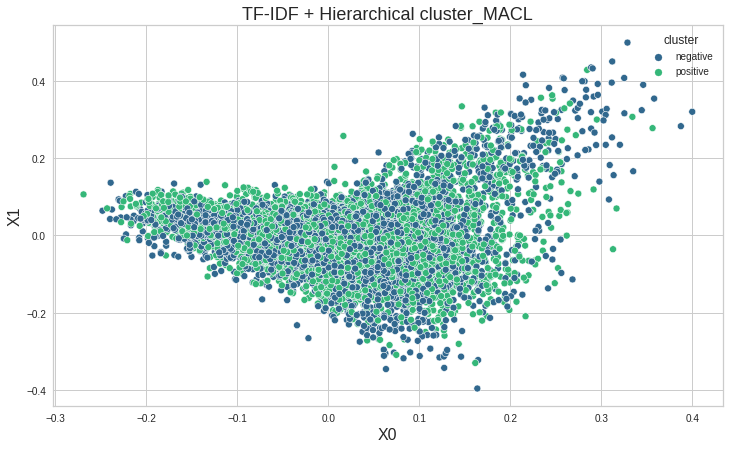

In [ ]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + Hierarchical cluster_MACL", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

## BIRCH

In [ ]:
brc2 = Birch(n_clusters=2, branching_factor = 50)
pred_labels_brc = brc2.fit_predict(svd_tfidf)

brc_labels2 = brc2.labels_

In [ ]:
# assign the cluster labels to the original dataset
df['cluster_brc'] = pred_labels_brc

# create a contingency table
cluster_counts_brc = df.groupby(['cluster_brc', 'voted_up']).size().reset_index(name='counts')
print(cluster_counts_brc)

   cluster_brc  voted_up  counts
0            0     False    9837
1            0      True    9760
2            1     False     218
3            1      True     185


In [ ]:
score_clustering(df.voted_up, brc_labels2)

Rand index           : 0.49997741887094355
Adjusted Mutual Info : 8.851536954494379e-05
Homogeneity          : 8.666477313487239e-05
Completeness         : 0.0006090927099536045
V measure            : 0.00015173931379627306
Fowlkes Mallows      : 0.6929877807254788


In [ ]:
# Evaluate the model's performance
score = silhouette_score(svd_tfidf, brc_labels2)
print(f"The model's performance is {score:.3f}")

The model's performance is 0.009


In [ ]:
# Evaluate the model's performance
score = calinski_harabasz_score(svd_tfidf, brc_labels2)
print(f"The model's performance is {score:.3f}")

The model's performance is 67.957


In [ ]:
# Evaluate the model's performance
score = davies_bouldin_score(svd_tfidf, brc_labels2)
print(f"The model's performance is {score:.3f}")

The model's performance is 4.620


#### Visualization of the results

##### WordCloud


Cluster 0
help,last,lack,may,abl,seri,move,done,definit,probabl,almost,open,refund,life,support,youll,design,cant,might,mayb,wont,real,mean,save,wast,alway,short,access,onlin,music,commun,overal,yet,origin,person,mission,expect,fan,awesom,minut,sure,version,finish,challeng,easi,content,old,multiplay,puzzl,fp


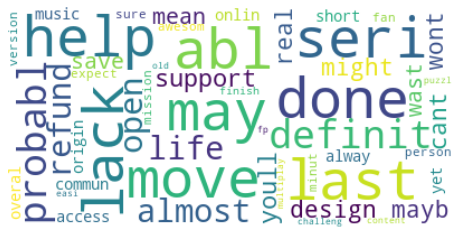


Cluster 1
manag,featur,real,destroy,cool,amount,idea,lack,learn,small,basic,land,huge,expect,sky,race,travel,design,random,access,creatur,mean,man,youll,attack,surviv,program,mayb,yet,stuff,content,battl,sim,trade,mission,gener,star,alien,pirat,engin,mine,univers,station,resourc,upgrad,fli,explor,planet,space,ship


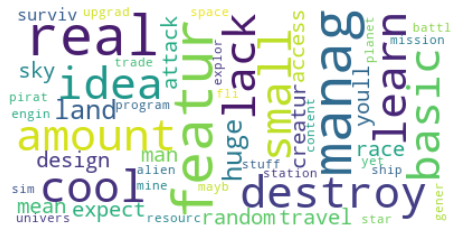

In [ ]:
def get_top_keywords_wordcloud(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(final_tv.todense()).groupby(brc_labels2).mean() # groups the TF-IDF vector by cluster
    terms = tv.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        top_keywords = [terms[t] for t in np.argsort(r)[-n_terms:]]
        print(','.join(top_keywords)) # for each row of the dataframe, find the n terms that have the highest tf idf score
        wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(top_keywords))
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()


get_top_keywords_wordcloud(50)

##### Scatterplot

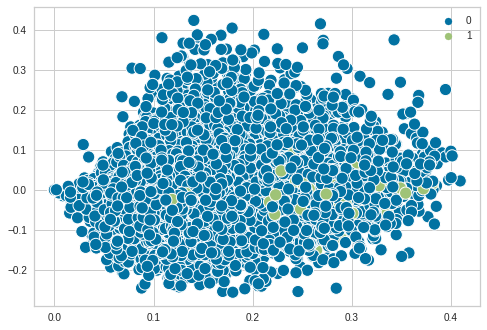

In [ ]:
sns.scatterplot(x = svd_tfidf[:, 0], y=svd_tfidf[:, 1], hue=brc_labels2, s=150)

##### Other visualization (with PCA)

In [ ]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(final_tv.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

Visualize cluster

In [ ]:
# assign clusters and pca vectors to our dataframe 
df['cluster'] = brc_labels2
df['x0'] = x0
df['x1'] = x1

In [ ]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(final_tv.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = tv.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
support,access,version,cant,wast,commun,refund,onlin,multiplay,fp

Cluster 1
style,boss,design,short,explor,mission,easi,music,challeng,puzzl


In [ ]:
# map clusters to appropriate labels 
cluster_map = {0: "negative", 1: "positive"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

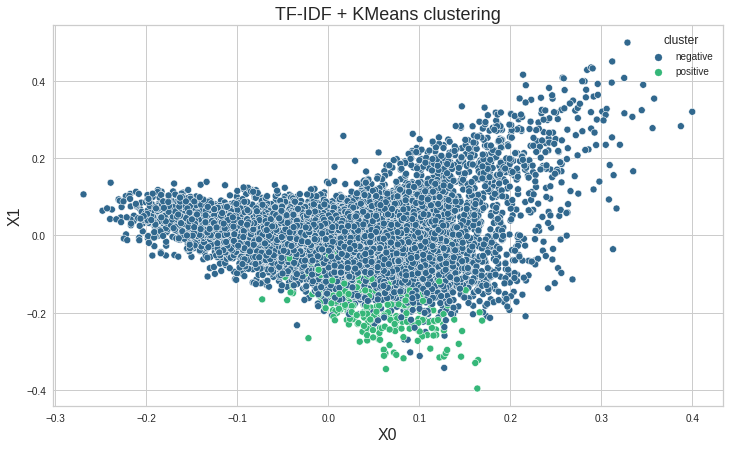

In [ ]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

## Optics

In [ ]:
optics = OPTICS()
optics_labels_pred = optics.fit_predict(svd_tfidf)

optics_clusters = optics.labels_

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [ ]:
# assign the cluster labels to the original dataset
df['cluster_optics'] = optics_labels_pred

# create a contingency table
cluster_counts_optics = df.groupby(['cluster_optics', 'voted_up']).size().reset_index(name='counts')
print(cluster_counts_optics)

    cluster_optics  voted_up  counts
0               -1     False    9954
1               -1      True    9796
2                0     False      10
3                0      True      29
4                1     False       1
5                1      True       4
6                2     False       2
7                2      True       3
8                3     False       2
9                3      True       3
10               4     False       5
11               5     False       2
12               5      True       8
13               6     False       6
14               7     False       1
15               7      True       4
16               8     False       3
17               8      True       5
18               9     False       1
19               9      True       5
20              10     False       4
21              10      True      17
22              11     False       5
23              11      True       3
24              12     False       6
25              12      True       2
2

In [ ]:
score_clustering(df.voted_up, optics_labels_pred)

Rand index           : 0.5000247262363118
Adjusted Mutual Info : 0.003930636267529401
Homogeneity          : 0.0034215441313042395
Completeness         : 0.022179693306111765
V measure            : 0.005928525888732532
Fowlkes Mallows      : 0.6982880964545394


In [ ]:
# Evaluate the model's performance
score_op = silhouette_score(svd_tfidf, optics_clusters)
print(f"The model's performance is {score_op:.3f}")

The model's performance is -0.274


In [ ]:
# Evaluate the model's performance
score_op = calinski_harabasz_score(svd_tfidf, optics_clusters)
print(f"The model's performance is {score_op:.3f}")

The model's performance is 7.785


In [ ]:
# Evaluate the model's performance
score_op = davies_bouldin_score(svd_tfidf, optics_clusters)
print(f"The model's performance is {score_op:.3f}")

The model's performance is 1.764


#### Visualization of the results

##### WordCloud

In [ ]:
#ANOTHER WAY
def get_top_keywords_wordcloud(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(final_tv.todense()).groupby(optics_clusters).mean() # groups the TF-IDF vector by cluster
    terms = tv.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        top_keywords = [terms[t] for t in np.argsort(r)[-n_terms:]]
        print(','.join(top_keywords)) # for each row of the dataframe, find the n terms that have the highest tf idf score
        wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(top_keywords))
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()


get_top_keywords_wordcloud(50)

##### Scatterplot

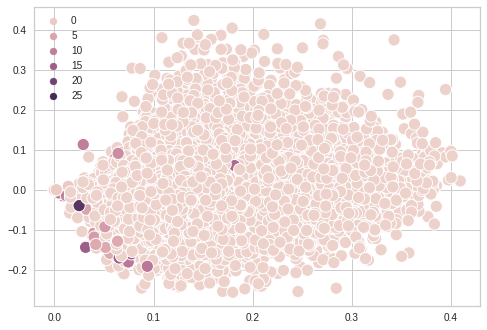

In [ ]:
sns.scatterplot(x = svd_tfidf[:, 0], y=svd_tfidf[:, 1], hue=optics_clusters, s=150)

##### USELESS Other visualization (with PCA)

In [ ]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(final_tv.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

Visualize cluster

In [ ]:
# assign clusters and pca vectors to our dataframe 
df['cluster'] = optics_clusters
df['x0'] = x0
df['x1'] = x1

In [ ]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(final_tv.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = tv.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
support,access,version,cant,wast,commun,refund,onlin,multiplay,fp

Cluster 1
style,boss,design,short,explor,mission,easi,music,challeng,puzzl


In [ ]:
# map clusters to appropriate labels 
cluster_map = {0: "general", 1: "support"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

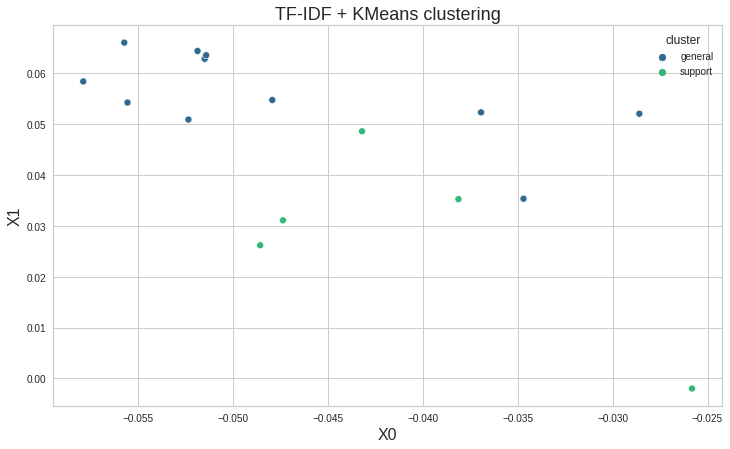

In [ ]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

## DBSCAN

Different metrics: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html

### Euclidean Metric

In [ ]:
db = DBSCAN(eps=0.5, min_samples=5, metric = 'euclidean').fit(svd_tfidf) #manhattan has the same results
db_labels = db.labels_

#n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
#n_noise_ = list(db_labels).count(-1)

In [ ]:
score_clustering(df.voted_up, db_labels)

Rand index           : 0.5000798739936997
Adjusted Mutual Info : 0.003943487031970915
Homogeneity          : 0.003173094515057861
Completeness         : 0.016839901962149444
V measure            : 0.005339990002103372
Fowlkes Mallows      : 0.6941152896430222


In [ ]:
# Evaluate the model's performance
score = silhouette_score(svd_tfidf, db_labels)
print(f"The model's performance is {score:.3f}")

The model's performance is -0.188


In [ ]:
# Evaluate the model's performance
score = calinski_harabasz_score(svd_tfidf, db_labels)
print(f"The model's performance is {score:.3f}")

The model's performance is 9.913


In [ ]:
# Evaluate the model's performance
score = davies_bouldin_score(svd_tfidf, db_labels)
print(f"The model's performance is {score:.3f}")

The model's performance is 2.268


#### Visualization of the results

##### WordCloud

In [ ]:
def get_top_keywords_wordcloud(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(final_tv.todense()).groupby(db_labels).mean() # groups the TF-IDF vector by cluster
    terms = tv.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        top_keywords = [terms[t] for t in np.argsort(r)[-n_terms:]]
        print(','.join(top_keywords)) # for each row of the dataframe, find the n terms that have the highest tf idf score
        wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(top_keywords))
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

get_top_keywords_wordcloud(50)

##### Scatterplot

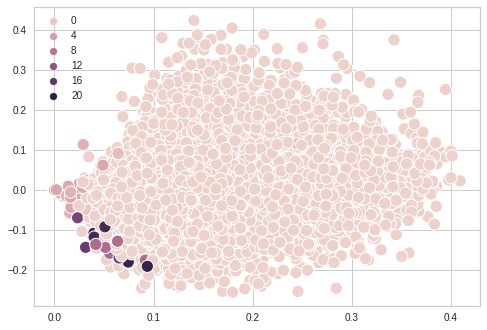

In [ ]:
sns.scatterplot(x = svd_tfidf[:, 0], y=svd_tfidf[:, 1], hue=db_labels, s=150)

##### USELESS Other visualization (with PCA)

In [ ]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(final_tv.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

Visualize cluster

In [ ]:
# assign clusters and pca vectors to our dataframe 
df['cluster'] = db_labels
df['x0'] = x0
df['x1'] = x1

In [ ]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(final_tv.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = tv.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
support,access,version,cant,wast,commun,refund,onlin,multiplay,fp

Cluster 1
style,boss,design,short,explor,mission,easi,music,challeng,puzzl


In [ ]:
# map clusters to appropriate labels 
cluster_map = {0: "negative", 1: "positive"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

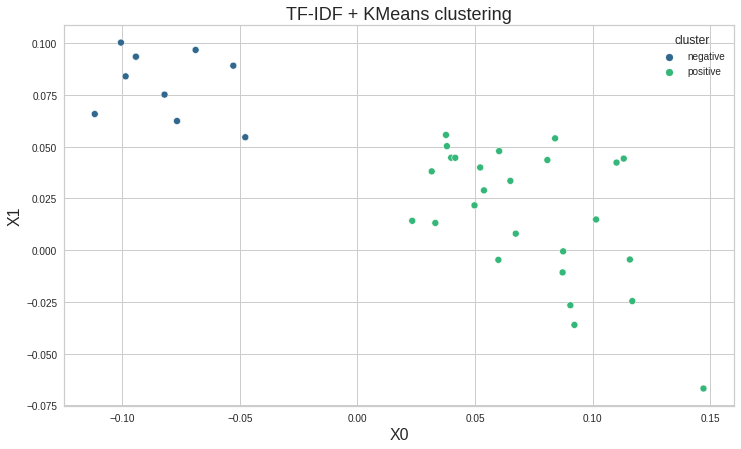

In [ ]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

### Manhattan Metric

In [ ]:
db = DBSCAN(eps=0.5, min_samples=5, metric = 'manhattan').fit(svd_tfidf) #manhattan has the same results
db_labels = db.labels_

In [ ]:
score_clustering(df.voted_up, db_labels)

Rand index           : 0.49999958997949895
Adjusted Mutual Info : 0.001092832431940439
Homogeneity          : 0.0006753554224889406
Completeness         : 0.024057326956197573
V measure            : 0.0013138280726443582
Fowlkes Mallows      : 0.7053749194074695


In [ ]:
# Evaluate the model's performance
score = silhouette_score(svd_tfidf, db_labels)
print(f"The model's performance is {score:.3f}")

The model's performance is -0.283


In [ ]:
# Evaluate the model's performance
score = calinski_harabasz_score(svd_tfidf, db_labels)
print(f"The model's performance is {score:.3f}")

The model's performance is 9.926


In [ ]:
# Evaluate the model's performance
score = davies_bouldin_score(svd_tfidf, db_labels)
print(f"The model's performance is {score:.3f}")

The model's performance is 3.105


#### Visualization of the results

##### WordCloud


Cluster -1
last,seri,may,lack,definit,abl,move,explor,probabl,almost,done,refund,open,life,support,wont,cant,might,youll,design,wast,mayb,real,save,mean,alway,short,onlin,music,commun,access,overal,origin,person,fan,yet,awesom,minut,sure,expect,version,mission,finish,challeng,easi,content,old,multiplay,puzzl,fp



Cluster 0
gather,freez,gave,gear,gener,genr,giant,girl,given,glad,glitch,goal,god,goe,gold,gon,gb,faster,free,frame,featur,felt,figur,file,fill,final,fine,finish,fire,fit,five,flaw,fli,franchis,floor,focus,follow,food,forc,forev,forget,form,forum,forward,found,four,fp,focu,zone,meow


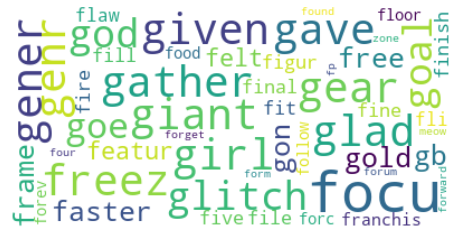


Cluster 1
gave,frequent,gb,gener,genr,giant,girl,given,glad,glitch,goal,god,goe,gold,gon,gon na,gear,favorit,freez,franchis,felt,figur,file,fill,final,fine,finish,fire,fit,five,flaw,fli,floor,free,focu,follow,food,forc,forev,forget,form,forum,forward,found,four,fp,frame,focus,zone,de


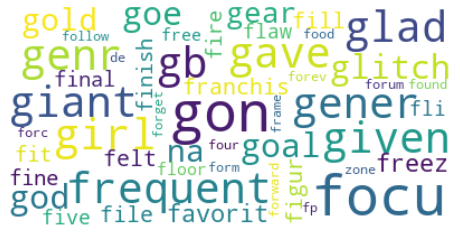


Cluster 2
gb,gear,gener,genr,giant,girl,given,glad,glitch,goal,god,goe,gold,freez,felt,free,focu,file,fill,final,fine,finish,fire,fit,five,flaw,fli,floor,franchis,focus,zone,forward,food,forc,forev,frame,forget,form,fp,forum,follow,found,four,extrem,exampl,platform,fair,repeat,ignor,cheat


In [ ]:
def get_top_keywords_wordcloud(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(final_tv.todense()).groupby(db_labels).mean() # groups the TF-IDF vector by cluster
    terms = tv.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        top_keywords = [terms[t] for t in np.argsort(r)[-n_terms:]]
        print(','.join(top_keywords)) # for each row of the dataframe, find the n terms that have the highest tf idf score
        wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(top_keywords))
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

get_top_keywords_wordcloud(50)

##### Scatterplot

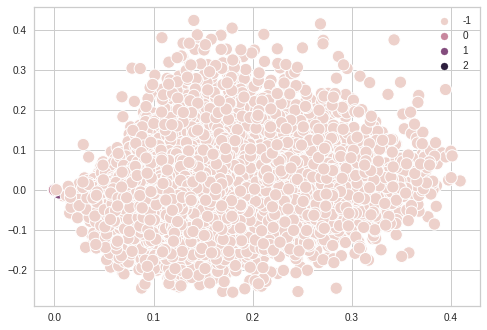

In [ ]:
sns.scatterplot(x = svd_tfidf[:, 0], y=svd_tfidf[:, 1], hue=db_labels, s=150)

##### USELESS Other visualization (with PCA)

In [ ]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(final_tv.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

Visualize cluster

In [ ]:
# assign clusters and pca vectors to our dataframe 
df['cluster'] = db_labels
df['x0'] = x0
df['x1'] = x1

In [ ]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(final_tv.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = tv.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
support,access,version,cant,wast,commun,refund,onlin,multiplay,fp

Cluster 1
style,boss,design,short,explor,mission,easi,music,challeng,puzzl


In [ ]:
# map clusters to appropriate labels 
cluster_map = {0: "negative", 1: "positive"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

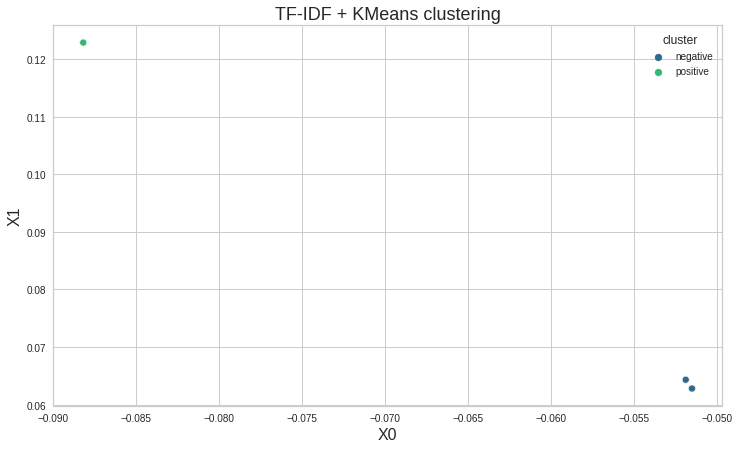

In [ ]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

### Cosine Metric

In [ ]:
db = DBSCAN(eps=0.5, min_samples=5, metric = 'cosine').fit(svd_tfidf)
db_labels = db.labels_

In [ ]:
score_clustering(df.voted_up, db_labels)

Rand index           : 0.5001346917345867
Adjusted Mutual Info : 0.0016840030989310633
Homogeneity          : 0.003292106068702113
Completeness         : 0.002893250836283748
V measure            : 0.003079818604720907
Fowlkes Mallows      : 0.5026907161489572


In [ ]:
# Evaluate the model's performance
score = silhouette_score(svd_tfidf, db_labels)
print(f"The model's performance is {score:.3f}")

The model's performance is -0.091


In [ ]:
# Evaluate the model's performance
score = calinski_harabasz_score(svd_tfidf, db_labels)
print(f"The model's performance is {score:.3f}")

The model's performance is 4.538


In [ ]:
# Evaluate the model's performance
score = davies_bouldin_score(svd_tfidf, db_labels)
print(f"The model's performance is {score:.3f}")

The model's performance is 3.754


#### Visualization of the results

##### WordCloud

In [ ]:
def get_top_keywords_wordcloud(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(final_tv.todense()).groupby(db_labels).mean() # groups the TF-IDF vector by cluster
    terms = tv.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        top_keywords = [terms[t] for t in np.argsort(r)[-n_terms:]]
        print(','.join(top_keywords)) # for each row of the dataframe, find the n terms that have the highest tf idf score
        wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(top_keywords))
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

get_top_keywords_wordcloud(50)

##### Scatterplot

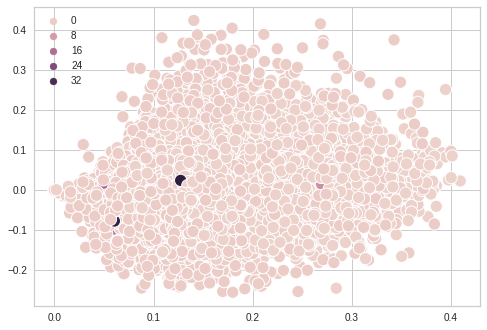

In [ ]:
sns.scatterplot(x = svd_tfidf[:, 0], y=svd_tfidf[:, 1], hue=db_labels, s=150)

##### USELESS Other visualization (with PCA)

In [ ]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(final_tv.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

Visualize cluster

In [ ]:
# assign clusters and pca vectors to our dataframe 
df['cluster'] = db_labels
df['x0'] = x0
df['x1'] = x1

In [ ]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(final_tv.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = tv.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
support,access,version,cant,wast,commun,refund,onlin,multiplay,fp

Cluster 1
style,boss,design,short,explor,mission,easi,music,challeng,puzzl


In [ ]:
# map clusters to appropriate labels 
cluster_map = {0: "negative", 1: "positive"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

In [ ]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()